# What Influences the Total Cost of Operation of Swiss Railways?

This notebook aims to gether, process and visualise data relating to total cost of operation of Swiss railways. 

Code avaliable: https://github.com/YaooWang/casa0006

Data source: https://pages.stern.nyu.edu/~wgreene/Econometrics/PanelDataSets.htm

## 1.0 | Introduction

The development of railways involves a complex interplay of technological, economic, social, and poliltical factors. It have played a pivotal role in shaping modern transportation and had a profound impact on societies, economies, and urban development. It provides a sustainable and efficient mode of transportation that promotes economic growth, job creation, accessibility, and connectivity while reducing environmental impact and congestion on roads. It has played a crucial role in shaping modern societies and continues to be an important contributor to global development and progress.

In Switzerland, the integration of different modes of transportation(rail, bus, tram, etc.) into a seamless network adds complexity to the cost structure. Swiss railways are known for their high quality of service, safety standards, and reliability, which can come at a higher cost compared to less developed systems. The total cost of Swiss railways is influenced by a combination of factors that impact various aspects of railway operations, infrastructure development, and maintenance. In this study, we try to explore the influential factors affecting the operating costs of Swiss railways and the relationship between them. By analysing multi-year data from several companies, we hope to provide a valuable reference for the evaluation of the system. 

### 1.1 | Getting Started

In [1]:
# Packages and environment for data manipulation and processing

In [2]:
pip install linearmodels

Note: you may need to restart the kernel to use updated packages.


In [46]:
#  This code from https://github.com/Azure/azure-sdk-for-python/issues/28651
!pip install typing_extensions==4.4.0
import typing_extensions
from importlib import reload
reload(typing_extensions)
!pip install azure.ai.ml


  Using cached typing_extensions-4.4.0-py3-none-any.whl (26 kB)
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.3.0 requires statsmodels<0.14,>=0.13.2, but you have statsmodels 0.14.0 which is incompatible.
azure-core 1.29.3 requires typing-extensions>=4.6.0, but you have typing-extensions 4.4.0 which is incompatible.
arviz 0.11.1 requires typing-extensions<4,>=3.7.4.3, but you have typing-extensions 4.4.0 which is incompatible.
  Using cached typing_extensions-4.7.1-py3-none-any.whl (33 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.4.0
    Uninstalling typing_extensions-4.4.0:
      Successfully u

In [4]:
# This code from https://stackoverflow.com/questions/11788900/importerror-no-module-named-statsmodels
pip install --upgrade --no-deps statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 26.8 MB/s eta 0:00:0000:010:01
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.2
    Uninstalling statsmodels-0.13.2:
      Successfully uninstalled statsmodels-0.13.2
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols
from linearmodels.panel import PooledOLS, PanelOLS
from linearmodels import RandomEffects
pd.plotting.register_matplotlib_converters()
from statsmodels.api import add_constant
from linearmodels.panel import PooledOLS
from statsmodels.iolib.summary2 import summary_col

## 2.0 | Literature review

Panel data, also known as longitudinal data or time-series cross-sectional data, is a type of dataset that encompasses observations of multiple entities (such as individuals, companies, countries) at various time points. It features both a  time dimension and an entity dimension. It can find extensive use in economics, studying economic growth, labor markets, international trade, etc. For instance, Petersen(2009) discusses standard error estimation methods for panel data in "Estimating Standard Errors in Finance Panel Data Sets: Comparing Approaches." The panel data also can be employed to study disease progression, drug effects, etc. In the study of Drukker et al.(2013), they used panel data to analyze factors contributing to income inequality in China. And it can also be used in psychology and sociology to study changes in individual behavior and psychological states. For instance, in one study named "Depression as Dynamical Disease", the author used panel data examine the dynamic nature of depresssion(Pezard et al., 1996). 

More specifically, panel data also has a wide range of applications in conducting economic cost impact factors. Liliana conducted a study using data from the German Socio-Economic Panel to investigate how employment affects individual happiness. Her findings revealed that being unemployed has a significant and negative impact on well-being, a effect that remains present even after factoring in individual-specific constants(1995). Linna investigated the progress of cost efficiency and productivity in Finnish hospitals from 1988 to 1994. The study employed a comparative method that incorporated both parametric and non-parametric panel models. The results suggest an average yearly growth in productivity ranging between 3% and 5%. About half of this growth is linked to improved cost efficiency, while the remaining portion is associated with technological innovations(1998). Another scholar employed panel data analysis to investigate impediments to global trade. The study revealed that trade expenses between the U.S. and its key trade associates decreased by an average of approximately 40% from 1970 to 2000, with the most significant reductions observed in trade costs with Mexico and Canada(Novy, 2013). Karlaftis and McCarthy(2002) investigate whether there are variations in public transit production methods based on the size and operational attributes of the transit system. The findings suggest that there is heterogeneity among U.S. transit entities in terms of production technologies. This implies that conducting cost analyses for public transit using a diverse range of systems will lead to inaccurate conclusions regarding transit costs and production frameworks. In this study, we tried to use panel data of Swiss Railways to investigate what factors will influence the total cost of railway opertaion.


Based on the above, there are the research questions:
   *  1. What factors affect the running total costs of Swiss railways and how do they relate to each other?
   *  2. For Swiss railways，whether is it true that the longer the railway networks, the higher the labour expenses required?

This study works to address in a repeatable and transferrable way, allowing the steps to be redeployed to others to gain understanding quickly.

## 3.0 | Data

The data we use was downloaded from the panel data sets from Panel Data Econometrics. It contains data from 49 railway operating companies in Switzerland over a 13-year period, and after a simple manual cleaning of the data, the data has 11 columns, here are the variables it contains：

1. *ID* = Company ID from 1 to 37.
2. *YEAR* = Year(1985 to 1997).
3. *NI* = Number of year observations for firm, repeated in each observation.
4. *STOPS* = Number of stations on the network.
5. *NETWORK* = Length of railway network(m).
6. *LABOREXP* = Labor expenses in 1000 CHF.
7. *STAFF* = Number of employees.
8. *ELECEXP* = Electricity expenses in 1000 CHF.
9. *KWH* = Total consumed electricity(in 1000 kWh).
10. *TOTCOST* = Total cost(in 1000 CHF).
11. *PE* = Price of electrity(CHF per kWh).


### 3.1 | Load the Data

In [7]:
# Load the dataset
data = pd.read_csv("https://raw.githubusercontent.com/YaooWang/casa0006/main/SwissRailways.csv")
data.head()

,id,YEAR,NI,STOPS,NETWORK,LABOREXP,STAFF,ELECEXP,KWH,TOTCOST,PE
0,1,85,13,15,27024,2240,41,82,861,4006,0.141723
1,1,86,13,15,27024,2424,42,152,1597,4575,0.134814
2,1,87,13,15,27024,2558,46,180,1899,4875,0.132754
3,1,88,13,16,27024,2670,45,190,1913,5132,0.136429
4,1,89,13,16,27024,2927,47,188,1883,5450,0.133656


In [8]:
# Look into the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        481 non-null    int64  
 1   YEAR      481 non-null    int64  
 2   NI        481 non-null    int64  
 3   STOPS     481 non-null    int64  
 4   NETWORK   481 non-null    int64  
 5   LABOREXP  481 non-null    int64  
 6   STAFF     481 non-null    int64  
 7   ELECEXP   481 non-null    int64  
 8   KWH       481 non-null    int64  
 9   TOTCOST   481 non-null    int64  
 10  PE        481 non-null    float64
dtypes: float64(1), int64(10)
memory usage: 41.5 KB


In [9]:
# Check the data type and whether there are some NaN values.
data.isnull().values.any()

False

In [10]:
data.isnull().sum()

id          0
YEAR        0
NI          0
STOPS       0
NETWORK     0
LABOREXP    0
STAFF       0
ELECEXP     0
KWH         0
TOTCOST     0
PE          0
dtype: int64

### 3.2 | Summary Statistics

In [11]:
# Count the rows of the dataset
data.count()

id          481
YEAR        481
NI          481
STOPS       481
NETWORK     481
LABOREXP    481
STAFF       481
ELECEXP     481
KWH         481
TOTCOST     481
PE          481
dtype: int64

In [12]:
# Describe the data
data.describe()

,id,YEAR,NI,STOPS,NETWORK,LABOREXP,STAFF,ELECEXP,KWH,TOTCOST,PE
count,481.000000,481.000000,481.0,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,19.000000,91.000000,13.0,20.827443,39533.956341,10281.887734,140.110187,716.434511,5775.209979,18402.702703,0.157429
std,10.688194,3.745553,0.0,20.161260,61097.269028,18796.138179,251.665871,1117.216364,10316.614979,31106.112046,0.023985
min,1.000000,85.000000,13.0,4.000000,3898.000000,951.000000,12.000000,14.000000,82.000000,1534.000000,0.076344
25%,10.000000,88.000000,13.0,9.000000,13810.000000,2408.000000,35.000000,177.000000,1448.000000,4986.000000,0.146717
50%,19.000000,91.000000,13.0,15.000000,22820.000000,3829.000000,52.000000,258.000000,1980.000000,7267.000000,0.158008
75%,28.000000,94.000000,13.0,20.000000,43396.000000,12817.000000,192.000000,749.000000,5698.000000,21351.000000,0.170891
max,37.000000,97.000000,13.0,121.000000,376997.000000,132746.000000,1641.000000,7851.000000,65849.000000,217270.000000,0.265182


In [13]:
dataA = data

In [14]:
 # Filter the whole dataset
reg_data=data[data['NI']==13].drop(['id','YEAR','NI'],axis=1)

In [15]:
vis_data = reg_data

In [16]:
reg_data[['STOPS','NETWORK','LABOREXP','STAFF','ELECEXP','KWH','TOTCOST','PE']]=reg_data[['STOPS','NETWORK','LABOREXP','STAFF','ELECEXP','KWH','TOTCOST','PE']].astype('category') # convert these columns to categorical

In [41]:
# Produce summary statistics and round all values to two decimal places
#.T transposes the table
summary=reg_data.describe().round(2) 
summary=summary.T 
summary

,count,unique,top,freq
STOPS,481.0,34.0,9.00,52.0
NETWORK,481.0,75.0,3898.00,13.0
LABOREXP,481.0,472.0,3068.00,3.0
STAFF,481.0,177.0,47.00,14.0
ELECEXP,481.0,361.0,225.00,7.0
KWH,481.0,456.0,1623.00,3.0
TOTCOST,481.0,475.0,5982.00,2.0
PE,481.0,480.0,0.16,2.0


### 3.3 | Data Visualization

First, we can plot the histogram of the dataset.

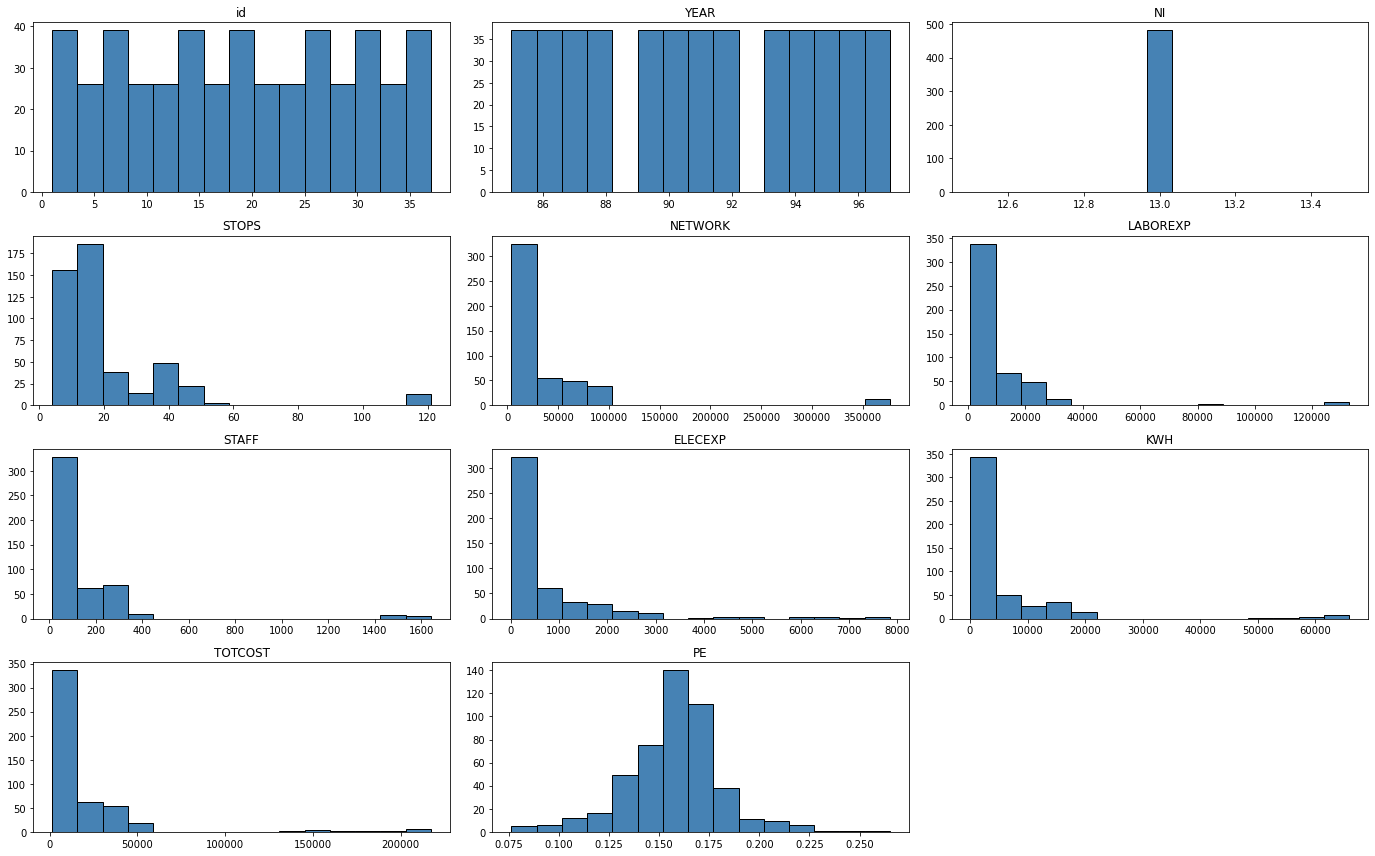

In [18]:
# Draw histograms
data.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=10, ylabelsize=10, grid=False, figsize = (16,10))    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

In regression analysis, generally we want the data to show a normal distribution pattern. However, as can be seen from the bar chart analysis above, most of the data is not normally distributed.

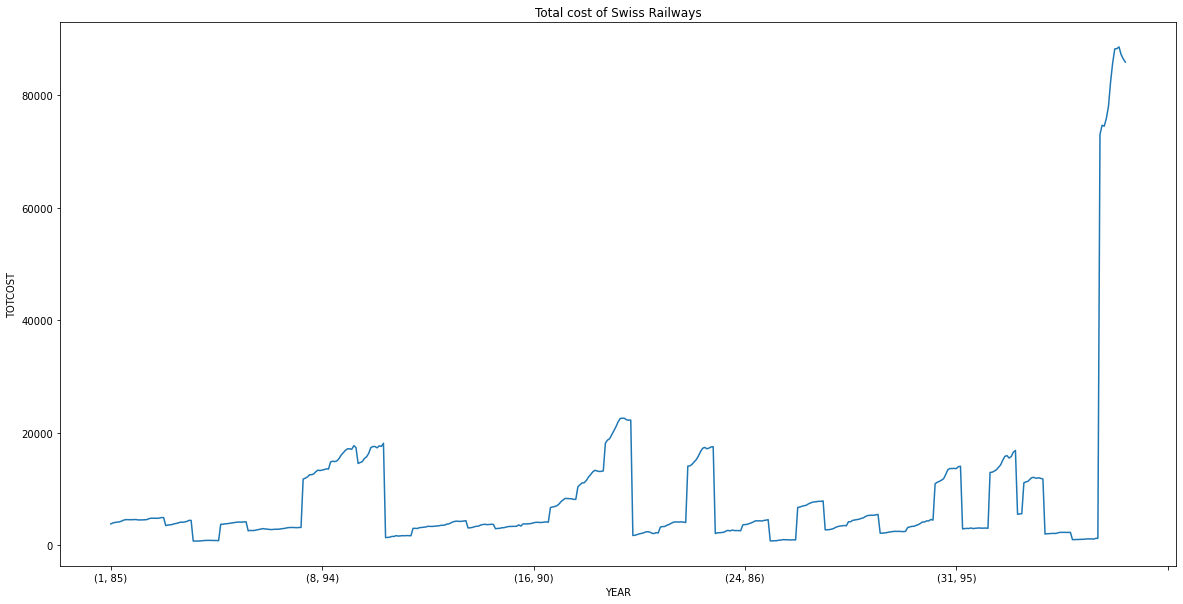

In [42]:
# Create a line graph to visualize the time series data.
data.mean(axis=1).plot()
plt.title('Total cost of Swiss Railways')
plt.ylabel('TOTCOST')
plt.xlabel('YEAR')
plt.show()

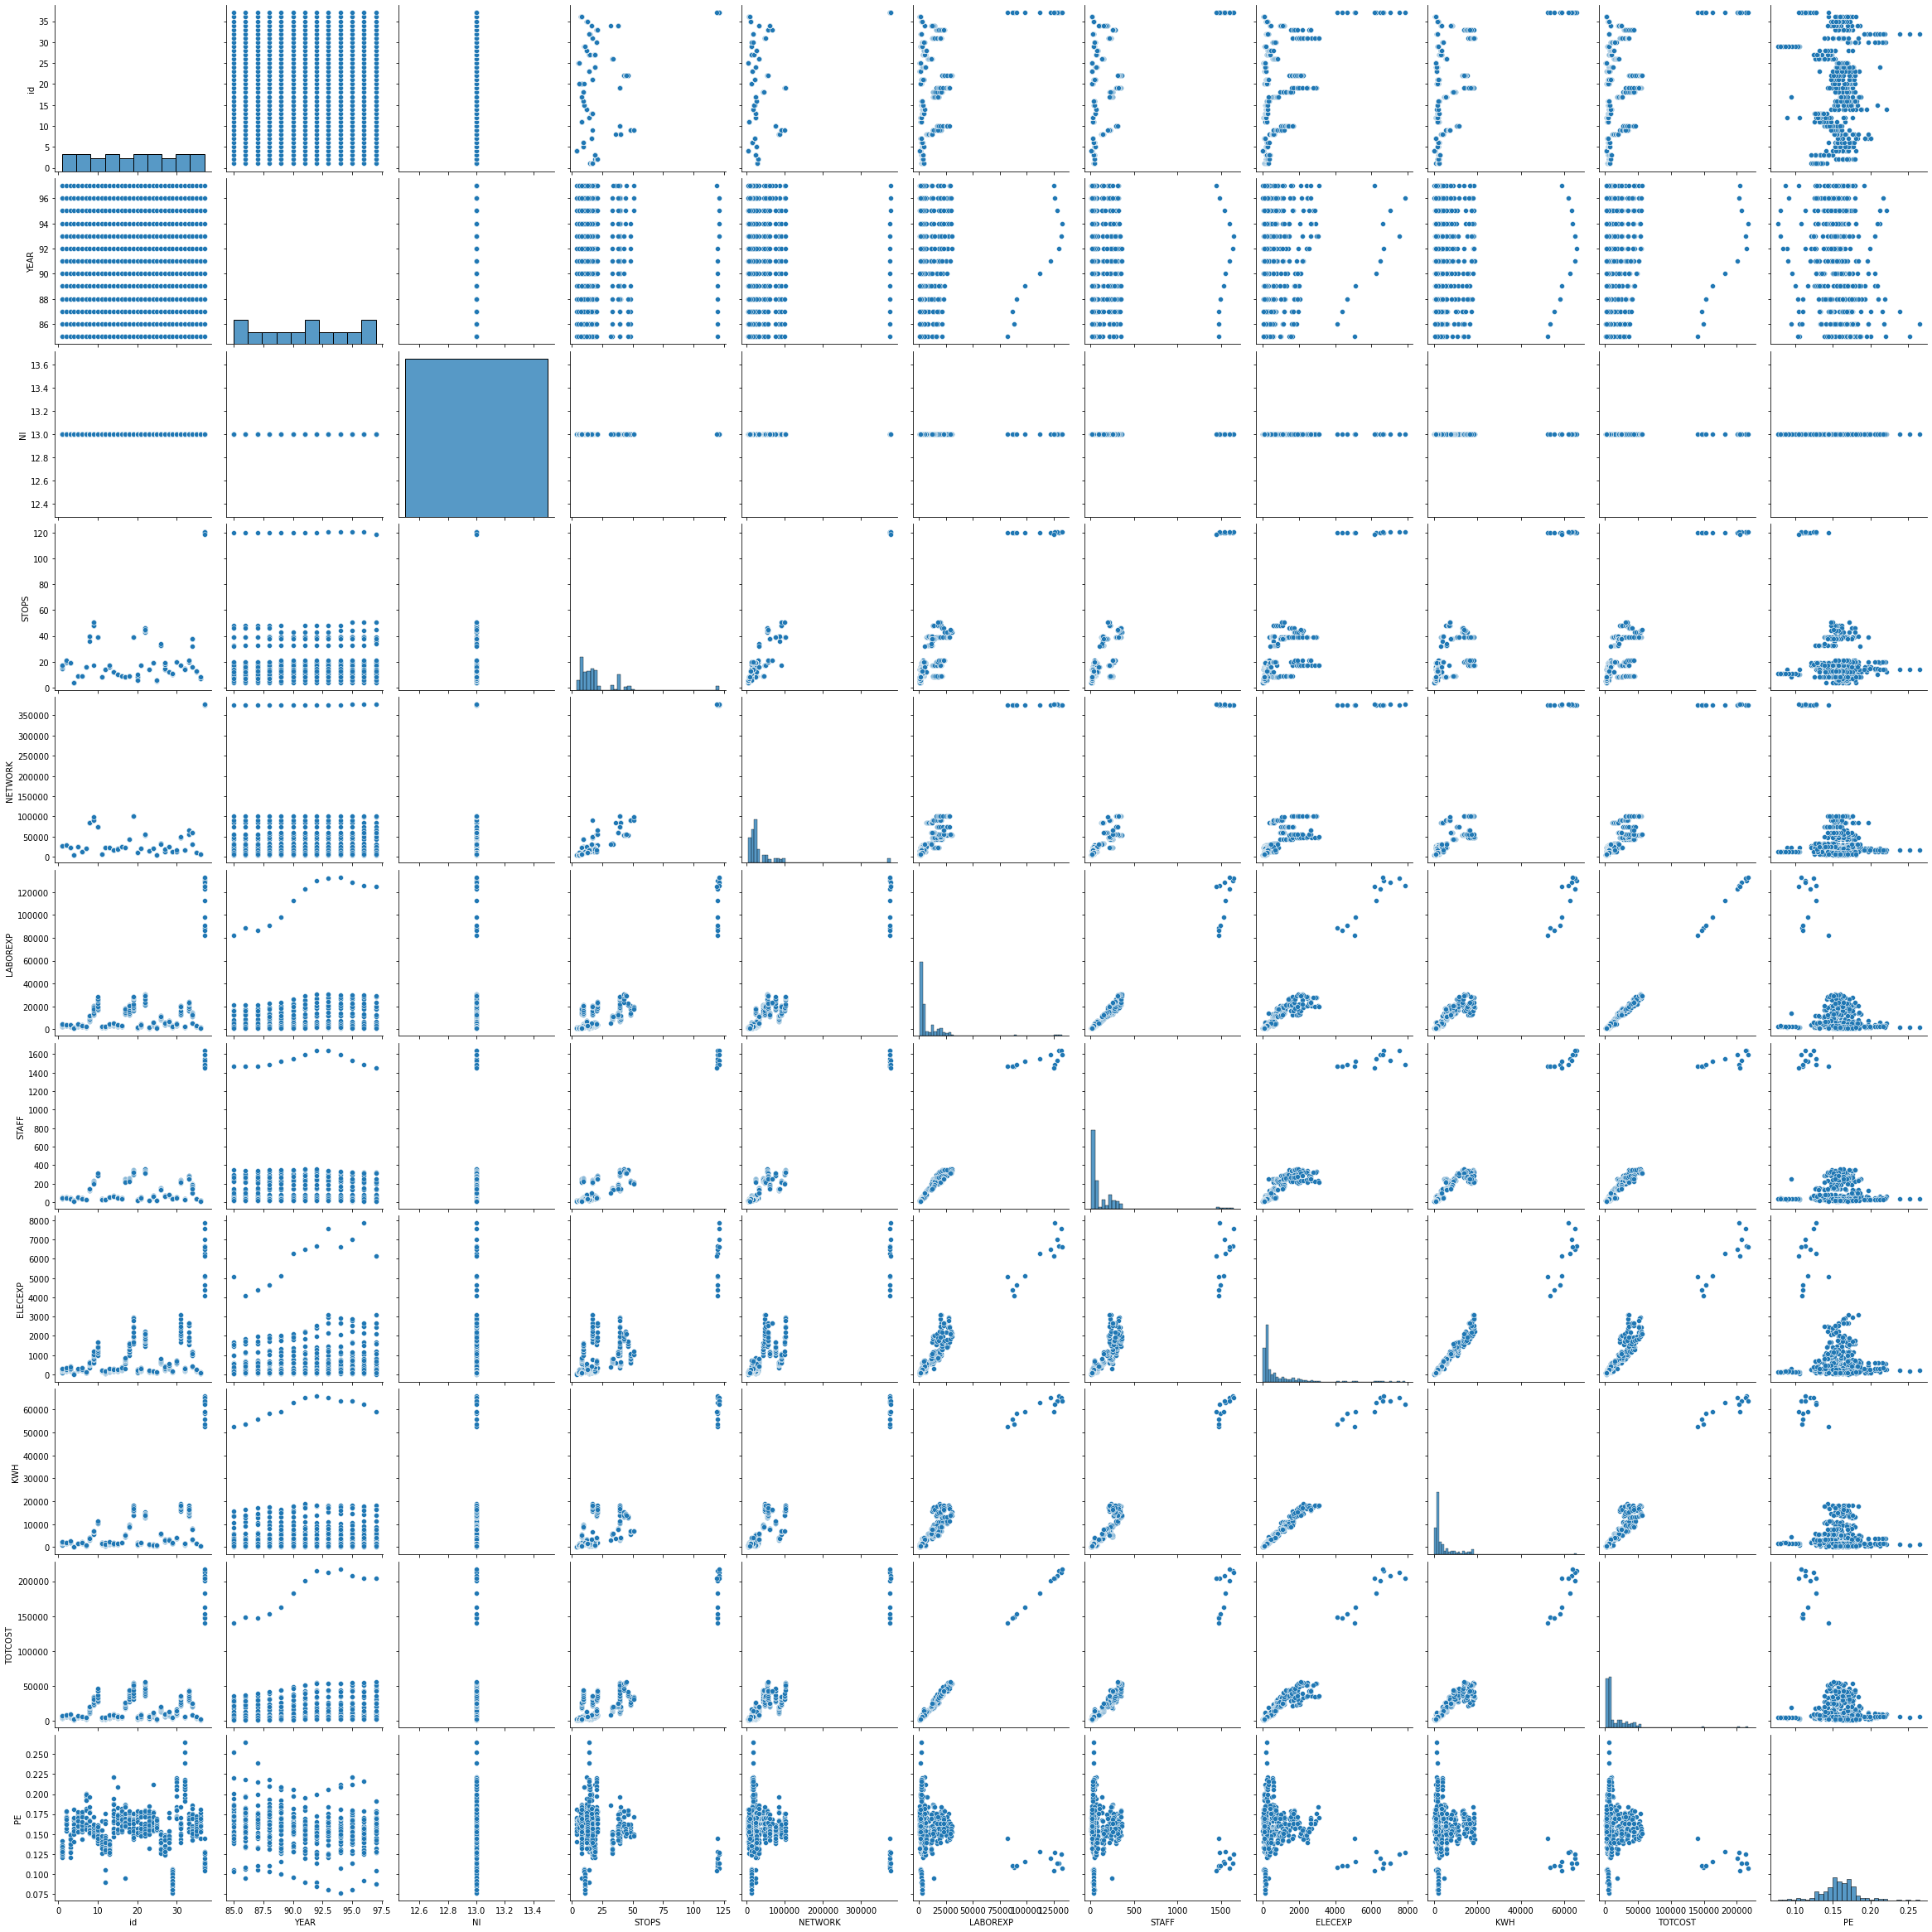

In [20]:
# Plot the relationship between different variables
plot_sns_city = sns.pairplot(data,height = 3)

Demonstrate the relationship between two variables. From this plot, we can see that many variables show a positive correlation.

<AxesSubplot:xlabel='id', ylabel='NETWORK'>

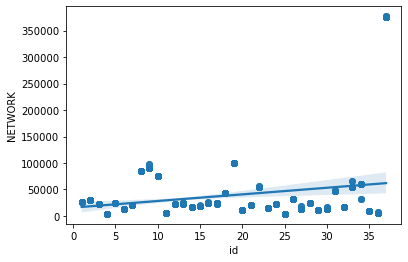

In [21]:
# Add scatterplot with regression trendline 
sns.regplot(x=data['id'], y=data['NETWORK'])

This plot shows the distribution of network lengths for different companies.

<AxesSubplot:xlabel='id', ylabel='LABOREXP'>

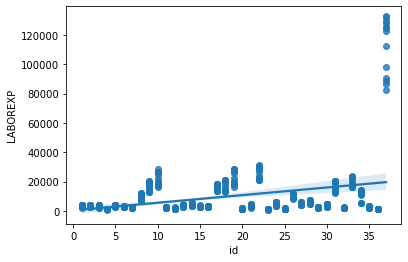

In [22]:
# Add scatterplot with regression trendline 
sns.regplot(x=data['id'], y=data['LABOREXP'])

This plot shows the distribution of labor expenses for different companies. From the plot we can see that one company has significantly higher labour costs than the others

<AxesSubplot:xlabel='id', ylabel='STAFF'>

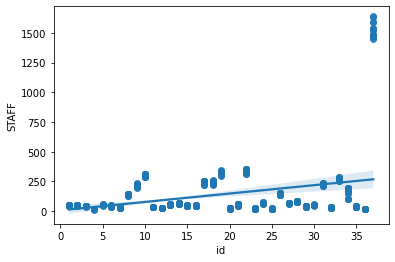

In [23]:
# Add scatterplot with regression trendline 
sns.regplot(x=data['id'], y=data['STAFF'])

This plot shows the distribution of staff number for different companies.

<AxesSubplot:xlabel='id', ylabel='TOTCOST'>

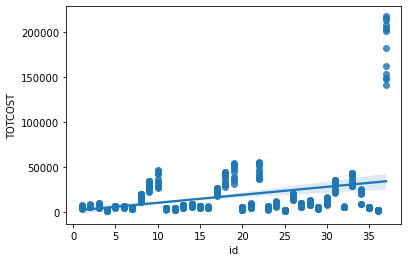

In [24]:
# Add scatterplot with regression trendline 
sns.regplot(x=data['id'], y=data['TOTCOST'])

This plot shows the distribution of total cost for different companies. As we can see from this plot, total costs vary widely among different companies.

<AxesSubplot:xlabel='id', ylabel='PE'>

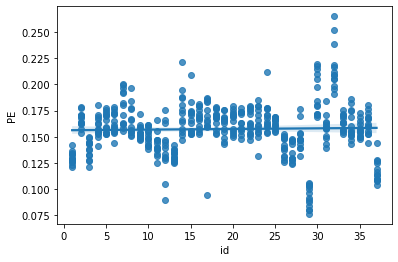

In [25]:
# Add scatterplot with regression trendline 
sns.regplot(x=data['id'], y=data['PE'])

As we can see from the plot, the cost of electricity varies from company to company.

## 4.0 | Methodology

### 4.1 | Pooled OLS Regression

Pooled OLS estimation involves applying the OLS technique to panel data, which encompass both time and cross-sectional dimensions. It is a fundamental statistical method used in various disciplines to examine the relationships between variables. It is particularly suited for cross-sectional data analysis, where observations are collected from multiple entities at a single point in time (Wooldridge, 2021). The pooled OLS regression approach is a straightforward extension  of the standard OLS method, tailored to address the complexities presented by this type of data. However, the pooled OLS approach overlooks the distinctive characteristics of panel data, leading to the complete disregard of individual-specific effects (Zhu and Li, 2021). Equation for Panel data The formula used in pooled OLS for panel data would be:

C = B0 + B1* Qit + B2 * PFit + B3 * Lfit + Vit

1. The regression coefficients remain consistent across all firms, meaning that B0, B1, B2, and B3 are uniform for every company.
2. The errors do not exhibit correlation with any of the explanatory variables; cov(Vit, Xit) = 0. In cases where there exists covariance between the error and predictor, the predictor becomes endogeneous, leading to potential bias and inconsistency in the intercept and coefficients.

### 4.2 |  Random Effects Estimation

Random Effects Estimation is a statistical method used in the field of econometrics and social sciences to analyze panel or longitudinal data(Breusch, 1987). Panel data refers to data collected over multiple time periods from a set of individuals, entities, or observations. This method is particularly useful when dealing with data that has both cross-sectional and time-series dimensions, allowing researchers to account for individual-specific differences and potential unobserved heterogeneity. The main goal of Random Effects Estimation is to gauge the connection between the dependent variable and the independent variables, while considering that distinct attributes specific to each individual entity within the panel dataset could influence the observed outcome. These individual-specific characteristics(Borenstein et al., 2010), which are not directly observed in the data, are referred to as "random effects."

Random Effects Estimation allows for the inclusion of time-invariant individual characteristics that might be correlated with the explanatory variables (Antweiler, 2001). It also provides more efficient estimates by exploiting the information from both within-individual and between-individual variations. And it can account for unobserved individual-specific heterogeneity, which can lead to biased estimates if ignored. 

### 4.3 | Fixed Effect Model

The Fixed Effects Model is a widely used statistical technique employed in various fields, such as economics, social sciences, and public health, to analyze panel data. The uniqueness of the Fixed Effects Model lies in its ability to account for unobserved heterogeneity across different entities. In many research settings, individual entities may have inherent characteristics that are not directly observable but can still significantly affect the outcomes being studied (Gardiner et al., 2009). These unobserved entity-specific factors can lead to omitted variable bias and distort the results of a standard regression analysis. It addresses this issue by introducing entity-specific intercepts into the regression equation.

By incorporating fixed intercepts for each entity, the model effectively captures the entity-specific effects that remain constant over time. This means that the model controls for all time-invariant factors that differentiate one entity from another. Consequently, the fixed effects model provides a way to differentiate the impact of time-varying independent variables on the dependent variable from the inherent differences between entities (Wooldridge, 2021).

The fixed effects model offers several advantages. It allows researchers to control for unobservable heterogeneity, thus producing more accurate and reliable estimates. It also helps mitigate endogeneity concerns that might arise from omitted variables. Moreover, it enables the examination of changes within each entity over time, providing insights into individual trajectories (Nickell, 1981).


### 4.4 | OLS Regression

Ordinary Least Squares (OLS) regression is a statistical technique employed to examine the correlation between a dependent variable (also referred to as the outcome) and one or more independent variables (also known as predictors or features). It is one of the most common techniques in the field of regression analysis, which aims to model the relationships between variables and make predictions based on those relationships(Kilmer and Rodríguez, 2017). OLS regression seeks to find the best-fitting linear relationship between the independent variables and the dependent variable. The "ordinary" in Ordinary Least Squares refers to the fact that it minimizes the sum of the squared differences between the observed values of the dependent variable and the values predicted by the linear regression model(Vinod, 1978).

It is a powerful tool for understanding and quantifying relationships between variables. It is widely used in fields such as economics, social sciences, engineering, and more, to uncover patterns, make predictions, and draw insights from data.

## 5.0 | Data Analysis

First of all, we start with the first research question: What factors affect the running total costs of Swiss railways and how do they relate to each other? Before the start, we need to set Company ID and Year to Multiindex.

### 5.1.1 Correlation

In [26]:
# Set Company ID and Year to MultiIndex
data = data.set_index(['id', 'YEAR'])

The columns contain multiple levels of indexing, known as a MultiIndex, with levels being ordered hierarchically. A MultiIndex is the simplest and most flexible way to manage panel data in pandas.

In [27]:
# See the correlation between variables
corr_matrix = data.corr()
print(corr_matrix)

          NI     STOPS   NETWORK  LABOREXP     STAFF   ELECEXP       KWH  \
NI       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
STOPS    NaN  1.000000  0.945380  0.893112  0.904651  0.830016  0.875615   
NETWORK  NaN  0.945380  1.000000  0.952756  0.969273  0.889858  0.945368   
LABOREXP NaN  0.893112  0.952756  1.000000  0.985568  0.950760  0.974380   
STAFF    NaN  0.904651  0.969273  0.985568  1.000000  0.931064  0.978878   
ELECEXP  NaN  0.830016  0.889858  0.950760  0.931064  1.000000  0.974736   
KWH      NaN  0.875615  0.945368  0.974380  0.978878  0.974736  1.000000   
TOTCOST  NaN  0.893242  0.951884  0.997082  0.983657  0.959656  0.978304   
PE       NaN -0.243412 -0.251942 -0.257583 -0.250494 -0.186740 -0.245821   

           TOTCOST        PE  
NI             NaN       NaN  
STOPS     0.893242 -0.243412  
NETWORK   0.951884 -0.251942  
LABOREXP  0.997082 -0.257583  
STAFF     0.983657 -0.250494  
ELECEXP   0.959656 -0.186740  
KWH       0.978304 -0.

In this table, we can see the corresponding correlations between the variables.

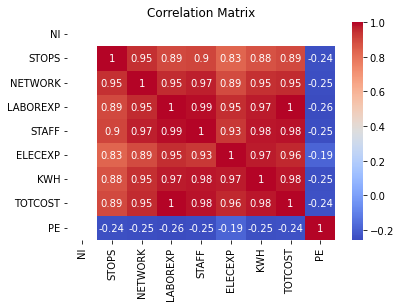

In [28]:
# Calculate the correlation coefficient between variables
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

This is the correlation matrix of the data. Along the diagonal, there are perfect correlations (1.00) since each variable is completely correlated with itself. As can be seen from the diagram, most of the variables in the dataset are highly correlated with each other. And present a positive correlation.

### 5.1.2 Heterogeneity

Testing for heterogeneity is crucial during panel data analysis because it helps us assess whether the relationships between variables remain consistent across different entities (such as individuals, firms, countries) over time. In panel data analysis, we are dealing with data that includes observations on the same entities repeatedly over multiple time periods. Heterogeneity refers to the variation in individual entities' characteristics, behaviors, or responses to changes in variables. accounting for heterogeneity allows for a more nuanced and accurate analysis of panel data, leading to more informed insights and conclusions that reflect the complexities of the real-world entities and their dynamics over time.

In [29]:
# Test for Heterogeneity
model_het = RandomEffects(data['TOTCOST'], exog=data.drop('TOTCOST', axis=1))
result_het = model_het.fit()
print(result_het.summary)

                        RandomEffects Estimation Summary                        
Dep. Variable:                TOTCOST   R-squared:                        0.9829
Estimator:              RandomEffects   R-squared (Between):              0.9955
No. Observations:                 481   R-squared (Within):               0.9757
Date:                Sun, Aug 27 2023   R-squared (Overall):              0.9949
Time:                        22:05:40   Log-likelihood                   -3968.5
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      3886.4
Entities:                          37   P-value                           0.0000
Avg Obs:                       13.000   Distribution:                   F(7,473)
Min Obs:                       13.000                                           
Max Obs:                       13.000   F-statistic (robust):             3886.4
                            

In [30]:
# Test for heteroscedasticity
model = sm.OLS(data['TOTCOST'], sm.add_constant(data.drop(columns=['TOTCOST'])))
result = model.fit()
bp_test = sms.het_breuschpagan(result.resid, result.model.exog)[1]
if bp_test < 0.05:
    print("Reject null hypothesis of homoskedasticity: Significant heteroskedasticity detected")
else:
    print("Fail to reject null hypothesis of homoskedasticity: No significant heteroskedasticity detected")

Reject null hypothesis of homoskedasticity: Significant heteroskedasticity detected


This indicates that there is heteroscedasticity in our data, it may lead to biased results. Hence, we can utilize a Q-Q plot to contrast the residuals of our model with a normal distribution in the following manner:

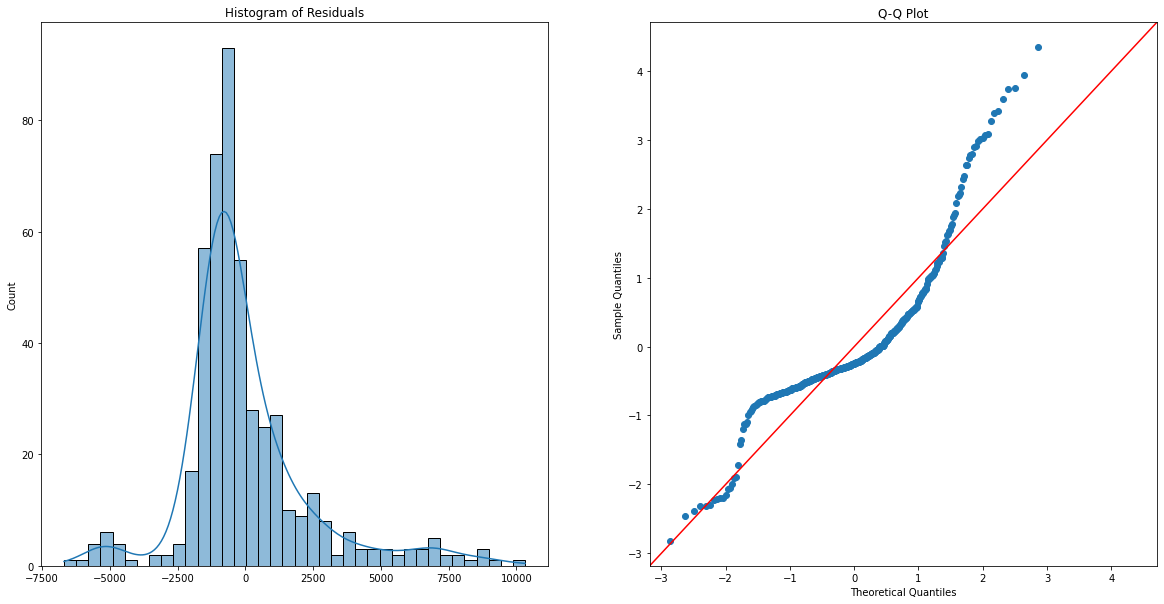

In [43]:
# Fit a model
model = ols('TOTCOST ~  LABOREXP', data=data).fit() 
# Get the residuals
residuals = model.resid 

# Make the figure wider
plt.rcParams["figure.figsize"] = [20, 10]

f, axes = plt.subplots(1, 2)
# Plot the residuals
sns.histplot(residuals, kde=True, ax=axes[0])
# Add a title
axes[0].set_title('Histogram of Residuals')

# Plot the residuals
sm.qqplot(residuals, line='45', fit=True,  ax=axes[1])
# Add a title
axes[1].set_title('Q-Q Plot')

# Show the plot
plt.show() 

The histogram of residualsseems to be less skewed, and more evenly distributed around 0. 

### 5.1.3 Multicollinearity 

Multicollinearity occurs when a model involves two or more independent variables that are highly correlated. In regression analysis, a key goal is to disentangle the relationship between each independent variable and the dependent variable. Interpreting a regression coefficient involves illustrating the average change in the dependent variable due to a one-unit change in an independent variable, while holding all other independent variables constant.

The idea centers on the concept that we can alter the value of a single independent variable while maintaining the others at a constant level. However, when independent variables are correlated, it indicates that changes in one variable correspond to shifts in another variable. The stronger the correlation, the more difficult it becomes to adjust one variable without causing modifications in another.

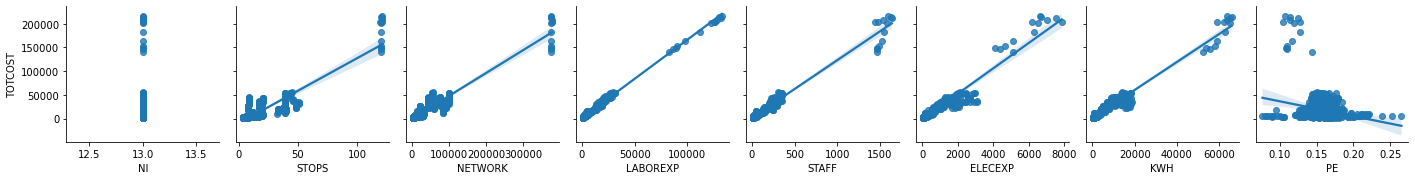

In [32]:
# Visualising the relationship between the variable and the dependent variable
sns.pairplot(data, x_vars=['NI', 'STOPS', 'NETWORK', 'LABOREXP', 'STAFF', 'ELECEXP', 'KWH', 'PE'], y_vars='TOTCOST', kind='reg')
plt.show()

As we can see from these graphs, there is a linear relationship between TOTCOST and STOPS, NETWORK, LABOREXP, STAFF, ELECEXP AND KWH.

In [33]:
# Testing for Multicollinearity 
X = data.drop('TOTCOST', axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [1 / (1 - r**2) for i, r in enumerate(np.linalg.inv(X.corr()).diagonal()) if i != 0]
vif["features"] = X.columns[1:]
print(vif)

   VIF Factor  features
0         NaN     STOPS
1         NaN   NETWORK
2         NaN  LABOREXP
3         NaN     STAFF
4         NaN   ELECEXP
5         NaN       KWH
6         NaN        PE


While an extremely high correlation coefficient among independent variables raises concerns, we can address this issue by employing the Variance Inflation Factor (VIF).

### 5.1.4  Pooled OLS

In [34]:
# Creating panel variables and explanatory variables
exog_vars = ['NI', 'STOPS', 'NETWORK', 'LABOREXP', 'STAFF', 'ELECEXP', 'KWH', 'PE']
endog_var = 'TOTCOST'

In [35]:
# Modelling panel regression using the PooledOLS function
model = PooledOLS(dependent=data[endog_var], exog=data[exog_vars])
result = model.fit(cov_type='clustered', cluster_entity=True, cluster_time=True)
print(result.summary)

                          PooledOLS Estimation Summary                          
Dep. Variable:                TOTCOST   R-squared:                        0.9959
Estimator:                  PooledOLS   R-squared (Between):              0.9968
No. Observations:                 481   R-squared (Within):               0.9676
Date:                Sun, Aug 27 2023   R-squared (Overall):              0.9959
Time:                        22:05:41   Log-likelihood                   -4338.6
Cov. Estimator:             Clustered                                           
                                        F-statistic:                   1.624e+04
Entities:                          37   P-value                           0.0000
Avg Obs:                       13.000   Distribution:                   F(7,473)
Min Obs:                       13.000                                           
Max Obs:                       13.000   F-statistic (robust):         -1.172e+05
                            

Through the analysis of Pooled OLS Regression, we can see the significance of each variable. From the result, the P-value of LABOREXP is 0.0000, less than 0.05, which means high significance of LABOREXP on TOTCOST. The R-squared is 0.9959, indicating that nearly 99.6% of the variation in total cost can be explained by this regresion model. It also means the model can fit this problem very well.

### 5.1.5 Fixed Effect Model

Fixed Effects in panel models are influences that are specific to a cross-section or a time period (or both). Also, they are assumed to be constant. Fixed effects are conceptually viewed as unchangeable characteristics of the level. In here, we use Fixed Effect Model to build the panel regression model. Fixed Effects can be estimated with the statsmodels package by adding cross-section to the PooledOLS method. 

In [36]:
# Panel regression modelling using the fixed effects model
model_fe = PanelOLS.from_formula('TOTCOST ~ NI + STOPS + NETWORK + LABOREXP + STAFF + ELECEXP + KWH + PE + EntityEffects', 
                                 data=data)
result_fe = model_fe.fit(cov_type='clustered', cluster_entity=True, cluster_time=True)
print(result_fe.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:                TOTCOST   R-squared:                        0.9761
Estimator:                   PanelOLS   R-squared (Between):              0.9834
No. Observations:                 481   R-squared (Within):               0.9761
Date:                Sun, Aug 27 2023   R-squared (Overall):              0.9832
Time:                        22:05:41   Log-likelihood                   -3940.6
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      2547.2
Entities:                          37   P-value                           0.0000
Avg Obs:                       13.000   Distribution:                   F(7,437)
Min Obs:                       13.000                                           
Max Obs:                       13.000   F-statistic (robust):            -1170.6
                            

The significance of fixed effects is indicated by the t-statistics and p-values of the variables. Adding fixed effects for cross-section only increased the absolute value and strangthened the significance for chosen independent variable, though none of fixed effects are significant at 5% level. The R-squared of the model is 0.9761, which means good model fitting. The P-value of STOPS, NETWORK and LABOREXP is 0.0008, 0.0002 and 0.0000. They all less than 0.005, which means these three variables have high significance on TOTCOST. And in this model, STOPS, STAFF, PE have negative correlation with TOTCOST. NETWORK, LABOREXP, ELECEXP and KWH have positive correlaiton with TOTCOST.

In the next setp, we will explore the second research question: For Swiss railways，whether is it true that the longer the railway networks, the higher the labour expenses required?

### 5.2.1 Data Visualation

In [37]:
# Read data
data2 = pd.read_csv("https://raw.githubusercontent.com/YaooWang/casa0006/main/SwissRailways.csv")
data2.set_index(['id', 'YEAR'], inplace=True)

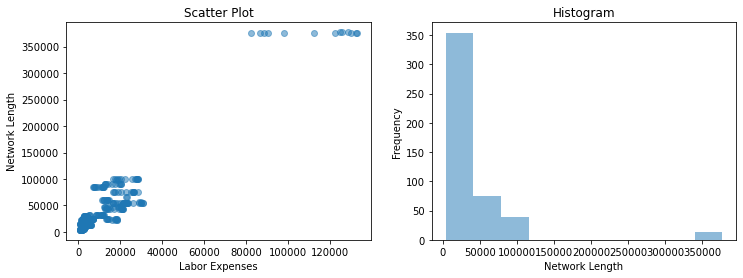

In [38]:
# Visualisation
fig, axs = plt.subplots(ncols=2, figsize=(12,4))
axs[0].scatter(data['LABOREXP'], data['NETWORK'], alpha=0.5)
axs[0].set_xlabel('Labor Expenses')
axs[0].set_ylabel('Network Length')
axs[0].set_title('Scatter Plot')

axs[1].hist(data['NETWORK'], alpha=0.5)
axs[1].set_xlabel('Network Length')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram')

plt.show()


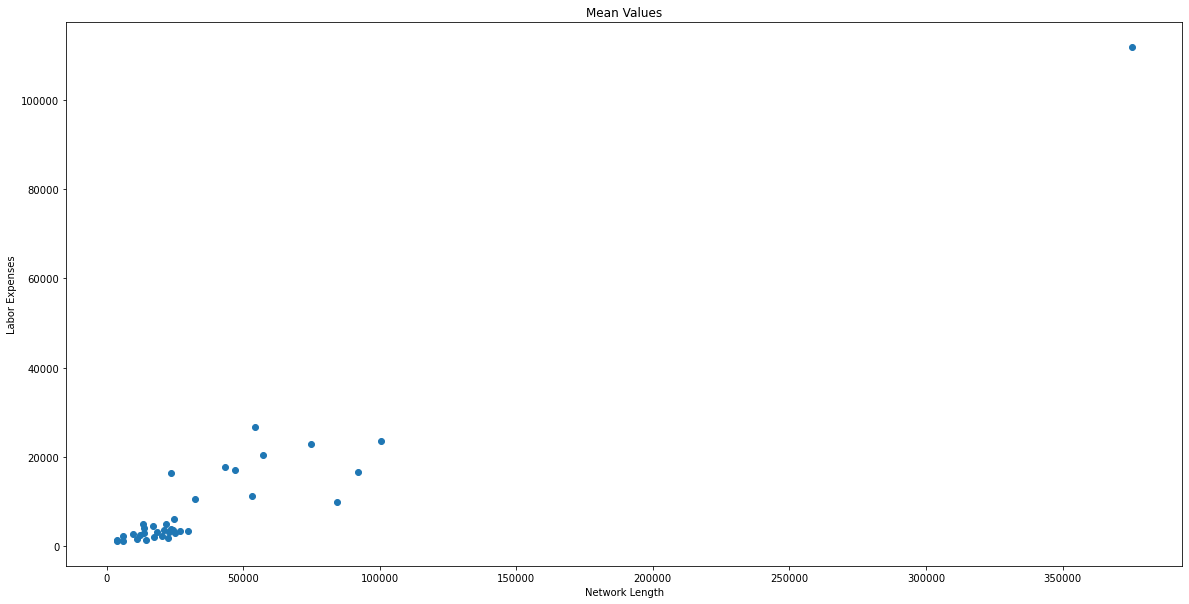

In [39]:
# Relationship between network length and labour expenditure
network_mean = data.groupby(['id'])['NETWORK'].mean()
labor_mean = data.groupby(['id'])['LABOREXP'].mean()
plt.scatter(network_mean, labor_mean)
plt.xlabel('Network Length')
plt.ylabel('Labor Expenses')
plt.title('Mean Values')
plt.show()

The above visualisation of the data looks like that there is a linear relationship between the length of Swiss railway network length and the labor expenses. And as the length of the railway increases, so does the labour expenses required.

### 5.2.2 OLS Regression

In [44]:
# Fit the model
model= ols('LABOREXP ~  NETWORK', data=data).fit()
# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               LABOREXP   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     4713.
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          5.00e-250
Time:                        22:20:10   Log-Likelihood:                -4842.6
No. Observations:                 481   AIC:                             9689.
Df Residuals:                     479   BIC:                             9697.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1305.8542    310.473     -4.206      0.0

In this model, R-squared is 0.908, which means 90.8% of the variation can be explained by this model. The P-value is 0.000, so we can say that the coefficient is statistically significant. And the coef is 0.2931, indicating 1 unit increase in network length leads to 0.2931 increase in labour expenses. So, it is true that the longer the railway networks, the higher the labour expenses required. 

## 6.0 | Conclusion

In conclusion, this study has carried panel data analysis of Swiss railways cost with the aim of answering the following research questions with each addressed below:

   *  1. What factors affect the running total costs of Swiss railways and how do they relate to each other?
   *  2. For Swiss railways，whether is it true that the longer the railway networks, the higher the labour expenses required?

For the first research question, all the variables in our model can affect the running total cost of Swiss railways, including the number of stations on the network, length of railway network, labor expenses, number of employees, electricity expenses, total consumed electricity and price of electricity. And in these variables, number of stations on the network, the length of railway network and labor expenses have high significance influence on total cost. And in this model, number of stations on the network, number of employees, price of electricity have negative correlation with total cost. Length of railway network, labor expenses, electricity expenses and total consumed electricity have positive correlation with total cost.

For the second research question, from the results of data analysis, it is true that the longer the railway networks, the higher the labour expenses required. 

## 7.0 | Bibliography

Antweiler, W., 2001. Nested random e!ects estimation in unbalanced panel data. J. Econom.

Appleton, S., Song, L., Xia, Q., 2014. Understanding Urban Wage Inequality in China 1988–2008: Evidence from Quantile Analysis. World Dev. 62, 1–13. https://doi.org/10.1016/j.worlddev.2014.04.005

Borenstein, M., Hedges, L.V., Higgins, J.P.T., Rothstein, H.R., 2010. A basic introduction to fixed-effect and random-effects models for meta-analysis. Res. Synth. Methods 1, 97–111. https://doi.org/10.1002/jrsm.12

Breusch, T.S., 1987. Maximum likelihood estimation of random effects models. J. Econom. 36, 383–389. https://doi.org/10.1016/0304-4076(87)90010-8

Gardiner, J.C., Luo, Z., Roman, L.A., 2009. Fixed effects, random effects and GEE: What are the differences? Stat. Med. 28, 221–239. https://doi.org/10.1002/sim.3478

Karlaftis, M.G., McCarthy, P., 2002. Cost structures of public transit systems: a panel data analysis. Transp. Res. Part E Logist. Transp. Rev. 38, 1–18. https://doi.org/10.1016/S1366-5545(01)00006-0

Kilmer, J.T., Rodríguez, R.L., 2017. Ordinary least squares regression is indicated for studies of allometry. J. Evol. Biol. 30, 4–12. https://doi.org/10.1111/jeb.12986

Linna, M., 1998. Measuring hospital cost efficiency with panel data models. Health Econ. 7, 415–427. https://doi.org/10.1002/(SICI)1099-1050(199808)7:5<415::AID-HEC357>3.0.CO;2-9

Nickell, S., 1981. Biases in Dynamic Models with Fixed Effects. Econometrica 49, 1417–1426. https://doi.org/10.2307/1911408

Novy, D., 2013. Gravity Redux: Measuring International Trade Costs with Panel Data. Econ. Inq. 51, 101–121. https://doi.org/10.1111/j.1465-7295.2011.00439.x

Petersen, M.A., 2009. Estimating Standard Errors in Finance Panel Data Sets: Comparing Approaches. Rev. Financ. Stud. 22, 435–480. https://doi.org/10.1093/rfs/hhn053

Pezard, L., Nandrino, J.-L., Renault, B., El Massioui, F., Allilaire, J.-F., Müller, J., Varela, F.J., Martinerie, J., 1996. Depression as a dynamical disease. Biol. Psychiatry 39, 991–999. https://doi.org/10.1016/0006-3223(95)00307-X

Vinod, H.D., 1978. A Survey of Ridge Regression and Related Techniques for Improvements over Ordinary Least Squares. Rev. Econ. Stat. 60, 121–131. https://doi.org/10.2307/1924340

Winkelmann, L., Winkelmann, R., 1995. Happiness and unemployment: a panel data analysis for Germany. https://doi.org/10.5167/UZH-1189

Wooldridge, J.M., 2021. Two-Way Fixed Effects, the Two-Way Mundlak Regression, and Difference-in-Differences Estimators. SSRN Electron. J. https://doi.org/10.2139/ssrn.3906345

Zhu, S., Li, W., 2021. Empirical Analysis of New Media Industry Development from the Perspective of Industry Convergence: Based on the Pooled OLS Model, in: 2021 International Conference on Management Science and Software Engineering (ICMSSE). Presented at the 2021 International Conference on Management Science and Software Engineering (ICMSSE), pp. 124–128. https://doi.org/10.1109/ICMSSE53595.2021.00034


